In [3]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-c

In [4]:
from datasets import load_dataset
original_dataset = load_dataset("dolphinium/wikiart-impressionism-curated", split="train")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/3.19k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

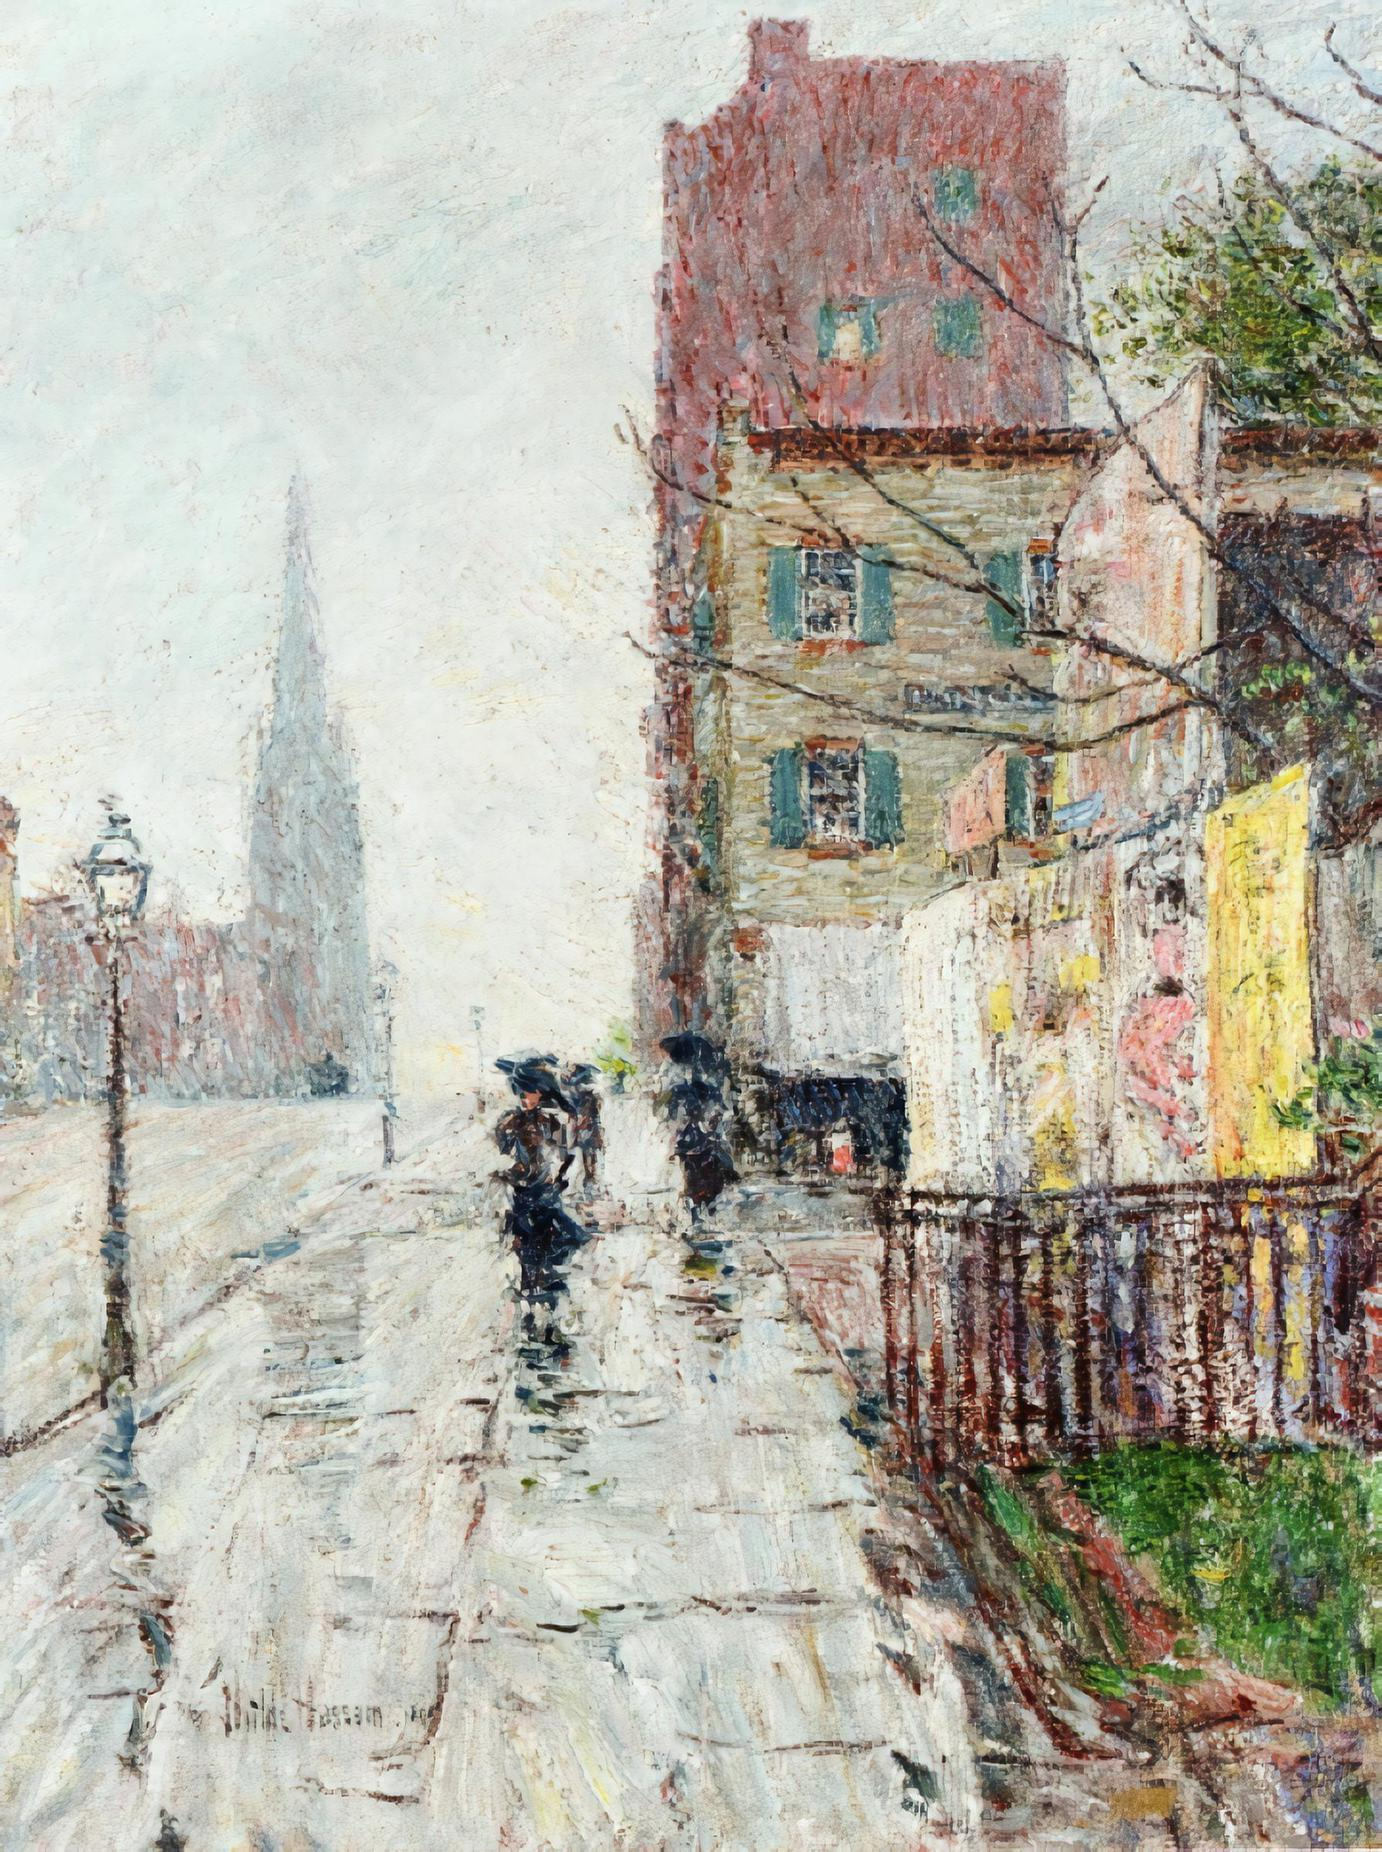

In [21]:
from IPython.display import display

# Get the image from the dataset
image = original_dataset[747]["image"]

# Display the image
display(image)

In [22]:
!pip install -q huggingface_hub

In [27]:
import json
from datasets import load_dataset, Dataset, Features, Image, Value
import pandas as pd
from huggingface_hub import login
import os
from google.colab import userdata


# Load the original dataset
print("Loading original dataset...")
dataset = load_dataset("dolphinium/wikiart-impressionism-curated", split="train")

# Load the captions
print("Loading captions...")
with open("/content/dataset_with_fixed_captions.json", "r") as f:
    captions_data = json.load(f)

# Create a lookup dictionary for captions
captions_lookup = {item['id']: item['caption'] for item in captions_data}

# Create new features list with proper types
features = Features({
    'id': Value('int64'),
    'image': Image(),
    'caption': Value('string'),
    'artist': Value('int64'),
    'genre': Value('int64'),
    'style': Value('int64'),
})

# Create a new dictionary with the data
new_data = {
    'id': list(range(len(dataset))),
    'image': dataset['image'],
    'caption': [captions_lookup[i] for i in range(len(dataset))],
    'artist': dataset['artist'],
    'genre': dataset['genre'],
    'style': dataset['style'],

}

# Create new dataset with proper features
updated_dataset = Dataset.from_dict(new_data, features=features)

Loading original dataset...


README.md:   0%|          | 0.00/4.62k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/5.56k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Loading captions...


In [28]:
updated_dataset[0]

{'id': 0,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2258x1382>,
 'caption': 'An impressionist painting depicts a wide, sandy beach under a cloudy sky, with figures scattered along the shore, rendered with loose, visible brushstrokes in muted tones of blue, brown, and white, creating a tranquil and airy atmosphere.',
 'artist': 6,
 'genre': 4,
 'style': 12}

In [29]:
token = userdata.get('hf_token')
if not token:
    raise ValueError("Please set HUGGINGFACE_TOKEN in your .env file")

login(token)

print("Pushing updated dataset to Hugging Face...")
updated_dataset.push_to_hub(
    "dolphinium/wikiart-impressionism-curated",
    split="train",
    private=False,
    commit_message="change dtype from bytes to Image"
)

print("Dataset successfully updated!")


Pushing updated dataset to Hugging Face...


Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Dataset successfully updated!
